<a href="https://colab.research.google.com/github/DiegoBrito17/Analise-de-dados/blob/main/Analisando_dados_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisando dados do **Titanic**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df =pd.read_csv('Titanic-Dataset.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Calculando estatisticas descritivas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df_filtrado =df[df['Age']>30]
df_filtrado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


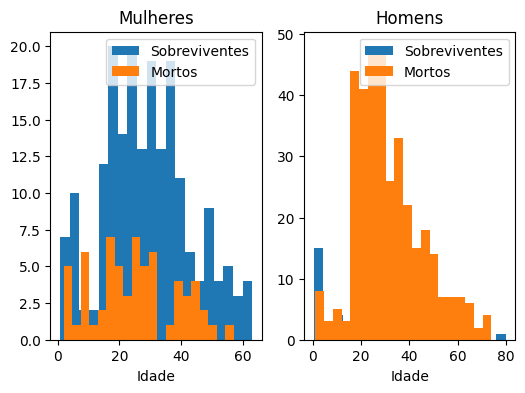

In [56]:
#Separando os dados das mulheres/homens
mulheres =df[df['Sex']=='female']
homens =df[df['Sex']=='male']
df_mulheres =df[df['Sex']=='female']
df_homens =df[df['Sex']=='male']
fig,axes =plt.subplots(1,2, figsize=(6,4))
axes[0].hist(df_mulheres[df_mulheres['Survived']==1].Age.dropna(),bins=20)
axes[0].hist(df_mulheres[df_mulheres['Survived']==0].Age.dropna(),bins=20)
axes[0].set_xlabel('Idade')
axes[0].legend(['Sobreviventes','Mortos'])
axes[0].set_title('Mulheres')
axes[1].hist(df_homens[df_homens['Survived']==1].Age.dropna(),bins=20)
axes[1].hist(df_homens[df_homens['Survived']==0].Age.dropna(),bins=20)
axes[1].set_xlabel('Idade')
axes[1].legend(['Sobreviventes','Mortos'])
axes[1].set_title('Homens')
plt.show()

axes[1].set_title('Homens')
plt.show()

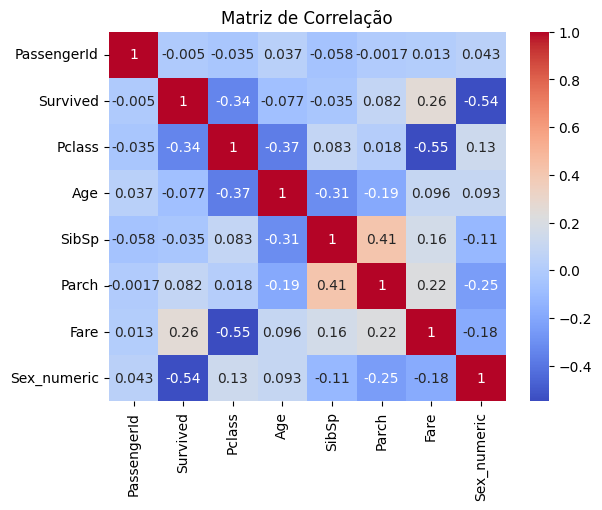

In [38]:
# 1. Converta colunas numéricas
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Survived'] = df['Survived'].astype(int)
# ... Converta outras colunas numéricas conforme necessário

# 2. Converta colunas categóricas
df['Sex_numeric'] = df['Sex'].map({'female': 0, 'male': 1})
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)

# 3. Lidando com valores ausentes (opcional)
# df.dropna() ou df['Age'].fillna(df['Age'].mean(), inplace=True)

# Selecione as colunas numéricas (incluindo as convertidas)
numerical_features = df.select_dtypes(include=['number'])

# Calcule a matriz de correlação
correlation_matrix = numerical_features.corr()

# Plota o heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

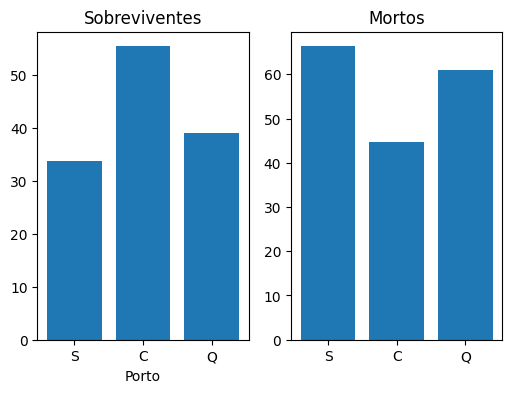

In [54]:
#criando gráfico de barras
#df['Survived'].value_counts().plot(kind='bar')
porto_S =df[df['Embarked']=='S']
porto_C =df[df['Embarked']=='C']
porto_Q =df[df['Embarked']=='Q']
fig,axes =plt.subplots(1,2, figsize=(6,4))

axes[0].bar(['S','C','Q'],[(porto_S[porto_S['Survived']==1].Survived.count()/(porto_S['Survived'].count()))*100,
                           (porto_C[porto_C['Survived']==1].Survived.count()/(porto_C['Survived'].count()))*100, # Corrected the indexing here
                           (porto_Q[porto_Q['Survived']==1].Survived.count()/(porto_Q['Survived'].count()))*100]) # Corrected the indexing here

axes[1].bar(['S','C','Q'],[(porto_S[porto_S['Survived']==0].Survived.count()/(porto_S['Survived'].count()))*100,
                           (porto_C[porto_C['Survived']==0].Survived.count()/(porto_C['Survived'].count()))*100, # Corrected the indexing here
                           (porto_Q[porto_Q['Survived']==0].Survived.count()/(porto_Q['Survived'].count()))*100]) # Corrected the indexing here


axes[0].set_xlabel('Porto')
axes[0].set_title('Sobreviventes')
axes[1].set_title('Mortos')
plt.show()

